# Import modules and define dictionary merge

In [1]:
import numpy as np
from sympy import *
from LieSympy import *
init_printing()

In [2]:
dx = Symbol('dx')
D_x = Symbol('D_x')

In [3]:
Prolong(['x'],['u','P'],[-u,x,1],3)

# The implicit differentiation operators

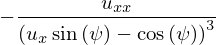

In [4]:
# test
Dnx(u,2)

# Define the moving frame for a cross-section

In [5]:
# test
K = [0,0,0]

frame = moving_frame(Phantoms,K)
frame

# Invariantization and the normalized invariants

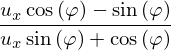

In [6]:
# test
normalized_invariant(u,1,frame)

In [7]:
invariantization(ux*uxx+u*uxx+x*P+P, frame)

# Determine recurrence relations

In [8]:
# test
mc_invariants = rec_Relations(Phantoms, frame)
mc_invariants

# Invariant differentiation from recurrence relations

In [9]:
def DI_x(f, mc_invariants):
    s = f.subs(transformed_subs_forward)
    w1 = apply_vect(v1,s.subs(transformed_subs_forward),A)
    w2 = apply_vect(v2,s.subs(transformed_subs_forward),A)
    w3 = apply_vect(v3,s.subs(transformed_subs_forward),A)
    c1 = mc_invariants[R1]
    c2 = mc_invariants[R2]
    c3 = mc_invariants[R3]
    print(invariantization(diff(f.subs(master_str_to_function),x).subs(master_function_to_str),frame))
    expression = invariantization(diff(f.subs(master_str_to_function),x).subs(master_function_to_symbol),frame) + c1*invariantization(w1,frame) + c2*invariantization(w2,frame) + c3*invariantization(w3,frame)
    return expression

# Exterior derivative

In [10]:
def exterior_diff(f,A):
    C = []
    f = f.subs(master_symbol_to_function)
    n = max([ode_order(f,Function(var)) for var in A[1]])
    f = f.subs(master_function_to_symbol)
    var = fullJet(A[0],A[1],n)
    for w in var:
        C.append(diff(f,master_str_to_symbol[w]))
    return C

In [11]:
exterior_diff(ux*x,A)

# Add differential one-forms

In [12]:
def add_Diff_Forms(C,D):
    s = max(len(C),len(D))
    C = C+[0]*(s-len(C))
    D = D+[0]*(s-len(D))
    return [a+b for a,b in zip(C,D)]

# Lie derivatives of contact forms

In [13]:
def Lie_contact_diff(v, var_index, i):
    n = i+1
    v_p = Prolong(A[0],A[1],v,n)
    var = fullJet(A[0],A[1],n)
    C = exterior_diff(v_p[1+var_index+2*i],A)
    D = exterior_diff(v_p[0],A)
    U_xi = [master_str_to_function[var[var_index+2*i+3]]]*len(D)
    D = [-a*b for a,b in zip(D,U_xi)]
    s = max(len(C),len(D))
    C = C + [0]*(s-len(C))
    D = D + [0]*(s-len(D))
    F = [-v_p[var_index+2*i+3]]+[0]*(s-1)
    Contact = [sum(t).subs(master_function_to_str) for t in zip(C,D,F)]
    expr = 0
    for i in range(len(Contact)-1):
        expr = expr + Contact[i+1]*contact_symbol[i]
    return expr.subs(master_str_to_symbol)

In [14]:
invariantization(Lie_contact_diff(v3, 0, 0),frame)

# Total Derivatives

In [15]:
def total_diff(f):
    var = copy.copy(master_str_to_symbol.keys())
    var.remove('x')
    var.sort()
    expr = diff(f,x)+0*x
    for i in range(len(var)-1):
        expr = expr + master_str_to_symbol[var[i+1]]*diff(f,master_str_to_symbol[var[i]])
    return expr

In [16]:
total_diff(P*u)

# Vertical derivatives

In [17]:
def vertical_diff(f):
    C = []
    f = f.subs(master_symbol_to_function)
    n = max([ode_order(f,Function(var)) for var in A[1]])
    var = fullJet(A[0],A[1],n)[1:]
    f = f.subs(master_function_to_symbol)
    for w in var:
        C.append(diff(f,master_str_to_symbol[w]))
    expr = 0*x
    for i in range(len(C)):
        expr = expr + C[i]*contact_symbol[i]
    return expr

In [18]:
vertical_diff(u*ux)

# Horizontal derivatives

In [19]:
def horizontal_diff(f):
    return total_diff(f)*dx

In [20]:
# Test
horizontal_diff(x*ux)

# Invariant differentiation rec relations

In [21]:
contact_symbol

In [22]:
theta_u = contact_symbol[0]
theta_phi = contact_symbol[1]

In [23]:
def rec_Relations_Forms(Phantoms, frame, A):
    B = []
    C = [0, theta_u, theta_phi]
    for i in range(len(Phantoms)):
        w = Phantoms[i]
        s = w.subs(transformed_subs_forward)
        w1 = apply_vect(v1,s.subs(transformed_subs_forward),A)
        w2 = apply_vect(v2,s.subs(transformed_subs_forward),A)
        w3 = apply_vect(v3,s.subs(transformed_subs_forward),A)
        expression = C[i] + epsilon_1*invariantization(w1,frame) + epsilon_2*invariantization(w2,frame) + epsilon_3*invariantization(w3,frame)
        B.append(expression)
    return solve(B,[epsilon_1,epsilon_2,epsilon_3])

In [24]:
rec_forms = rec_Relations_Forms(Phantoms,frame,A)
rec_forms

# Invariant Vertical Differentiation

In [25]:
def inv_D_x_contact(var_index, i):
    w1 = invariantization(Lie_contact_diff(v1, var_index, i),frame)
    w2 = invariantization(Lie_contact_diff(v2, var_index, i),frame)
    w3 = invariantization(Lie_contact_diff(v3, var_index, i),frame)
    return contact_symbol[var_index+2] + mc_invariants[R1]*w1+ mc_invariants[R2]*w2+ mc_invariants[R3]*w3

In [50]:
inv_D_x_contact(1,0)

In [27]:
contact_reduction = {contact_symbol[2]:solve(D_x*contact_symbol[0]-inv_D_x_contact(0,0), contact_symbol[2])[0],contact_symbol[3]:solve(D_x*contact_symbol[1]-inv_D_x_contact(1,0), contact_symbol[3])[0]}

# Invariant Vertical Differentiation

In [28]:
def invariant_vert_diff(var_index, i):
    expr = contact_symbol[var_index+2*i]
    w1 = rec_forms[epsilon_1]*invariantization(Prolong(A[0],A[1],v1,i)[1+var_index+2*i],frame)
    w2 = rec_forms[epsilon_2]*invariantization(Prolong(A[0],A[1],v2,i)[1+var_index+2*i],frame)
    w3 = rec_forms[epsilon_3]*invariantization(Prolong(A[0],A[1],v3,i)[1+var_index+2*i],frame)
    expr = expr + w1 + w2 + w3
    return expr

In [49]:
invariant_vert_diff(1,1).subs(contact_reduction)

# Invariant Eulerian Operator A*

In [30]:
def invariant_Euler():
    a11 = invariant_vert_diff(0,1).subs(contact_reduction).subs({contact_symbol[0]:1,contact_symbol[1]:0}).subs({D_x:-D_x})
    a21 = invariant_vert_diff(0,1).subs(contact_reduction).subs({contact_symbol[0]:0,contact_symbol[1]:1}).subs({D_x:-D_x})
    a12 = invariant_vert_diff(1,1).subs(contact_reduction).subs({contact_symbol[0]:1,contact_symbol[1]:0}).subs({D_x:-D_x})
    a22 = invariant_vert_diff(1,1).subs(contact_reduction).subs({contact_symbol[0]:0,contact_symbol[1]:1}).subs({D_x:-D_x})
    return Matrix([[a11,a12],[a21,a22]])

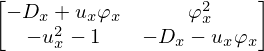

In [31]:
invariant_Euler()

# Invariant Hamiltonian Operator B*

In [32]:
def invariant_Hamilton():
    r = [R1,R2,R3]
    ep = [epsilon_1,epsilon_2,epsilon_3]
    vectors = [v1,v2,v3]
    w1 = 0*x
    w2 = 0*x
    for i in range(3):
        w1 = w1-mc_invariants[r[i]]*diff(vectors[i][0],u)*contact_symbol[0]+total_diff(vectors[i][0])*rec_forms[ep[i]]
        w2 = w2-mc_invariants[r[i]]*diff(vectors[i][0],P)*contact_symbol[1]
    b1 = (w1+w2).subs({contact_symbol[0]:1, contact_symbol[1]:0}).subs({D_x:-D_x})
    b2 = (w1+w2).subs({contact_symbol[0]:0, contact_symbol[1]:1}).subs({D_x:-D_x})
    return Matrix([[b1],[b2]])

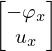

In [33]:
invariant_Hamilton()

# Define the Euler Operator $\mathcal{E}_s$

In [34]:
def Euler(L,var_index):
    var = ['u','P']
    var_sub = [var[var_index]+'x'*k for k in range(1,3)]
    expr = 0*x
    for i in range(len(var_sub)):
        expr = expr + (-1)**i*diff(diff(L,master_str_to_symbol[var_sub[i]]).subs(master_symbol_to_function),x,i)
    return expr.subs(master_function_to_symbol)

In [35]:
Euler(ux,0)

# Define the Hamiltonian Operator $\mathcal{H}$

In [36]:
# Need dictionaries first

# Invariant Euler-Lagrange Equations

In [56]:
def inv_Euler_Lagrange(L):
    inv_A = invariant_Euler()
    inv_B = invariant_Hamilton()
    expr1 = (inv_A[0,0]*Euler(L,0)+inv_A[0,1]*Euler(L,1)-(-L)*inv_B[0,0]).subs({D_x:0})
    expr2 = (inv_A[1,0]*Euler(L,0)+inv_A[1,1]*Euler(L,1)-(-L)*inv_B[1,0]).subs({D_x:0})
    return solve(Matrix([[expr1],[expr2]]))

In [58]:
inv_Euler_Lagrange(ux)

# Example
Examples of calculation that can by done with Lie_symmetry

### Prolongation

In [39]:
Prolong(['x'],['u','P'],[-u,x,1],3)

### Moving Frame

In [40]:
moving_frame(Phantoms,K)

### Invariantization of $I_{u,1}$

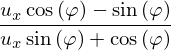

In [41]:
normalized_invariant(u,1,frame)

### Invariant Eulerian $A^*$

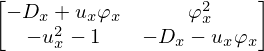

In [42]:
invariant_Euler()

### Invaiant Hamiltonian $B^*$

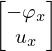

In [43]:
invariant_Hamilton()

### The simplified Invariant Euler-Lagrange equations for $L\,dx=\mu\,ds$

In [44]:
inv_Euler_Lagrange(Px)

In [45]:
Phantoms